In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor


In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pyspark.sql.types import IntegerType, DateType, ArrayType, StringType, FloatType, TimestampType


In [3]:
from razor.project.blocks.ayan_spark_blocks_clone import MercStatic
from razor.project.blocks.ayan_spark_blocks_clone import ReadCsvProjectSpace
from razor.project.blocks.ayan_spark_blocks_clone import TranCityTS
from razor.project.blocks.ayan_spark_blocks_clone import TranTypeTS
from razor.project.blocks.ayan_spark_blocks_clone import NonSparkPath
from razor.project.blocks.ayan_spark_blocks_clone import CustStatic
from razor.project.blocks.ayan_spark_blocks_clone import ProdTypeTS
from razor.project.blocks.ayan_spark_blocks_clone import CustMercTS
from razor.project.blocks.ayan_spark_blocks_clone import DropDuplicates

In [4]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [5]:
nsp = NonSparkPath(ip_path='customer_data.csv')

In [6]:
rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
rcp.executor = SparkExecutor

In [7]:
cs = CustStatic(ip_data = rcp.data, config={}, source="")
cs.executor = SparkExecutor

In [8]:
drp = DropDuplicates(ip_data = cs.customer_static, config={}, source="")
drp.executor = SparkExecutor

In [9]:
ms = MercStatic(ip_data = rcp.data, config={}, source="")
ms.executor = SparkExecutor

In [10]:
cm_ts = CustMercTS(ip_data = rcp.data, config={}, source="")
cm_ts.executor = SparkExecutor

In [11]:
pipe = rf.Pipeline('temp', targets = [cm_ts])

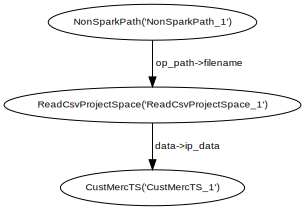

In [12]:
pipe

In [ ]:
pipe.execute()

log path: /tmp/tmpmb30ti5j/temp


ERROR:razor.flow.async_pipeline:Block: 'CustMercTS_1': Unhandled Exception: PythonException('\n  An exception was thrown from Python worker in the executor. The below is the Python worker stacktrace.\nTraceback (most recent call last):\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 589, in main\n    func, profiler, deserializer, serializer = read_udfs(pickleSer, infile, eval_type)\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 447, in read_udfs\n    udfs.append(read_single_udf(pickleSer, infile, eval_type, runner_conf, udf_index=i))\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 254, in read_single_udf\n    f, return_type = read_command(pickleSer, infile)\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 74, in read_command\n    command = serializer._read_with_length(file)\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 172, in _read_with_length\n    return self.loads(obj)\n  File 

In [ ]:
pip show pyspark

AttributeError: type object 'CustMercTS' has no attribute '__file__'